In [1]:
import torch

from model import Generator
from dataset import DatasetFromQuery
from glob import glob
from torchvision import transforms as T
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
gen = Generator()
gen.load_state_dict(torch.load('/workdir/dataset/checkpoints/91_adam_2019-05-17_23-10-07/generator_45.pth'))
gen.eval()

Generator(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(32, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (activate): ReLU(inplace)
)

In [4]:
img_list = glob('/workdir/dataset/Set5/*.bmp')

In [5]:
img_list

['/workdir/dataset/Set5/head_GT.bmp',
 '/workdir/dataset/Set5/bird_GT.bmp',
 '/workdir/dataset/Set5/butterfly_GT.bmp',
 '/workdir/dataset/Set5/baby_GT.bmp',
 '/workdir/dataset/Set5/woman_GT.bmp']

In [6]:
data = []

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


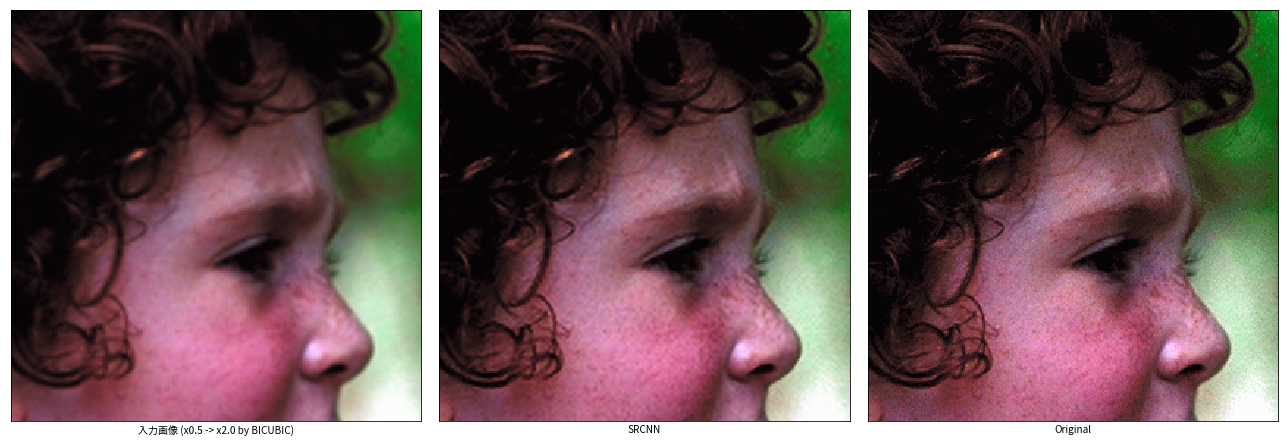

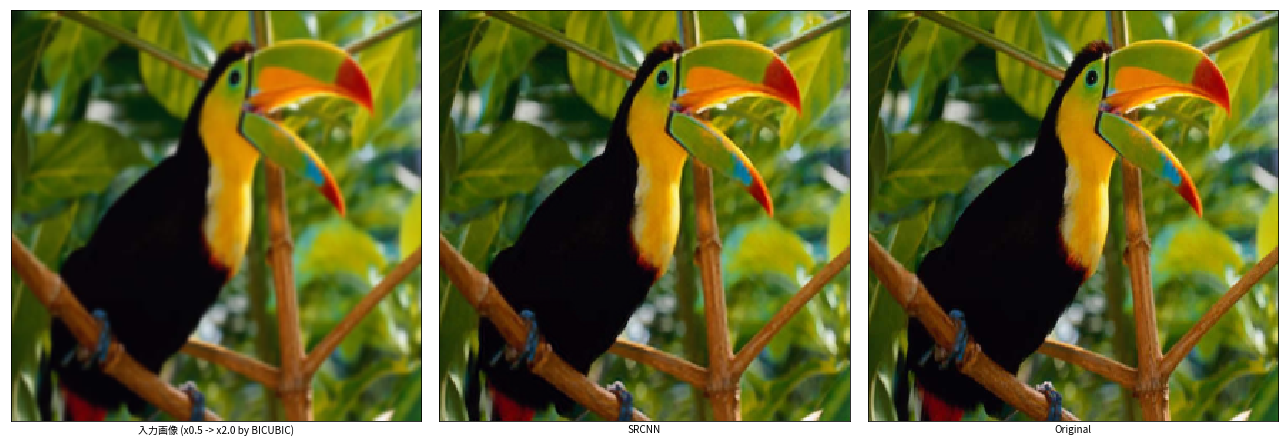

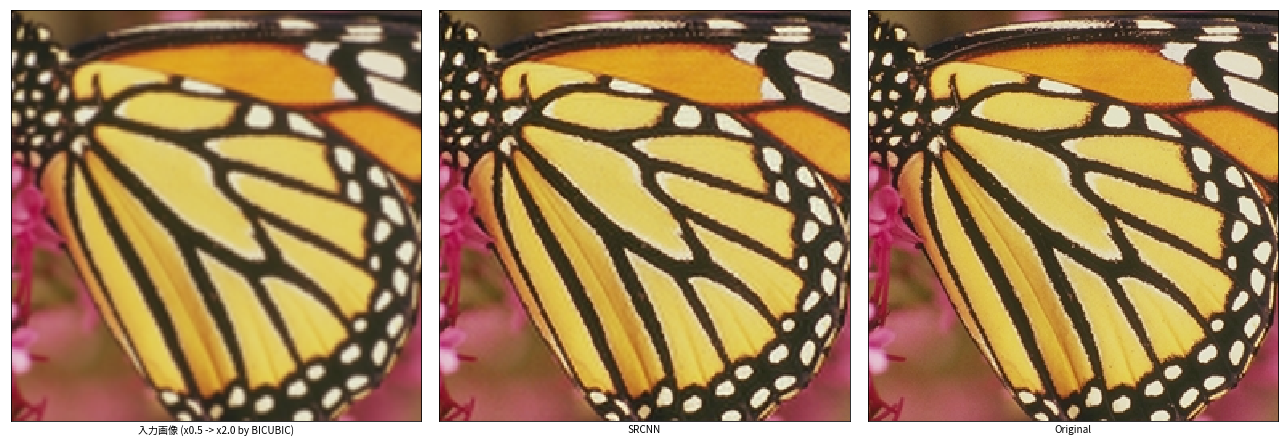

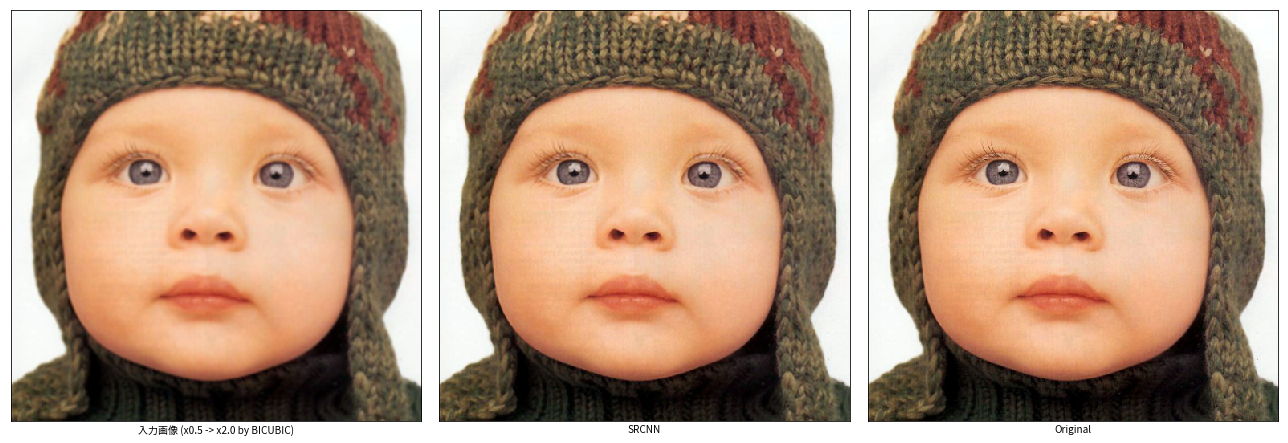

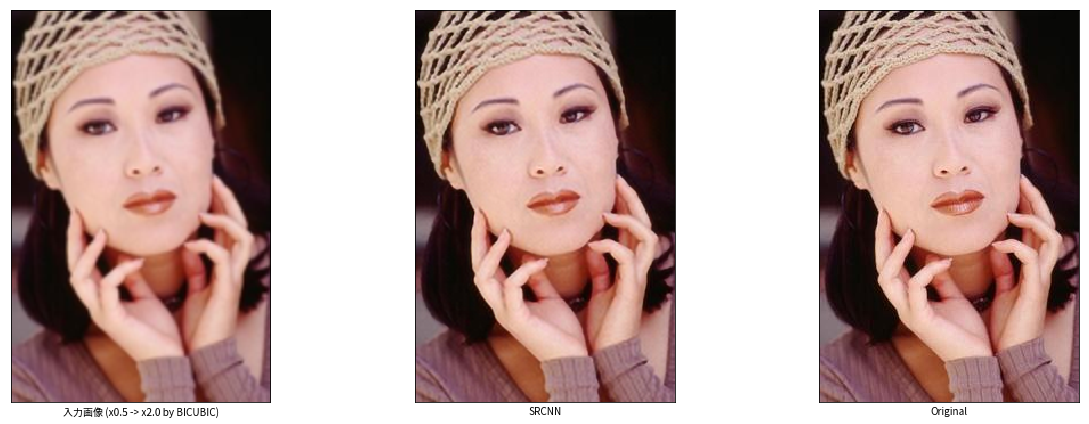

In [7]:
for p in img_list:
    img = Image.open(p)
    origin = img.copy()
    min_size = [int(x / 2) for x in img.size]
    input_transform = T.Compose([
        T.Resize(size=min_size[::-1]),
        T.Resize(size=origin.size[::-1], interpolation=Image.BICUBIC),
        T.ToTensor()
    ])
    to_tensor = T.ToTensor()

    x = input_transform(img)
    y = to_tensor(origin)
    with torch.no_grad():
        pred = gen(x[None, :, :, :])

    fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
    y = y.numpy().transpose(1, 2, 0)
    x = x.numpy().transpose(1, 2, 0)
    pred = pred.numpy()[0].transpose(1, 2, 0)
        
    axes[0].imshow(x)
    axes[0].set_xlabel('入力画像 (x0.5 -> x2.0 by BICUBIC)')
    
    axes[1].imshow(pred)
    axes[1].set_xlabel('SRCNN')
    
    axes[2].imshow(y)
    axes[2].set_xlabel('Original')
    
    fig.tight_layout()
    fname = os.path.basename(p).split('.')[0]
    fig.savefig(f'sample_{fname}.png', bbox_inches='tight', )
    
    data.append([x, y, pred])

In [8]:
clip_box = (100, 100, 300, 300)

In [9]:
def clip_image(img_arr, box):
    return img_arr[box[0]:box[2], box[1]:box[3], :]

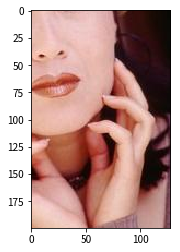

In [10]:
plt.imshow(clip_image(y, clip_box))

In [11]:
def plot_cliped_images(x, y, pred):
    images = [
        ['input(BICUBIC)', x],
        ['SRCNN', pred],
        ['Original', y],
    ]

    size = 6
    n_images = len(images)
    fig, axes = plt.subplots(ncols=n_images, figsize=(size * n_images, size))
    for ax, (name, img) in zip(axes, images):
        ax.imshow(clip_image(img, clip_box))
        ax.set_title(name)
        ax.set_xticks([])
        ax.set_yticks([])
    return fig, axes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


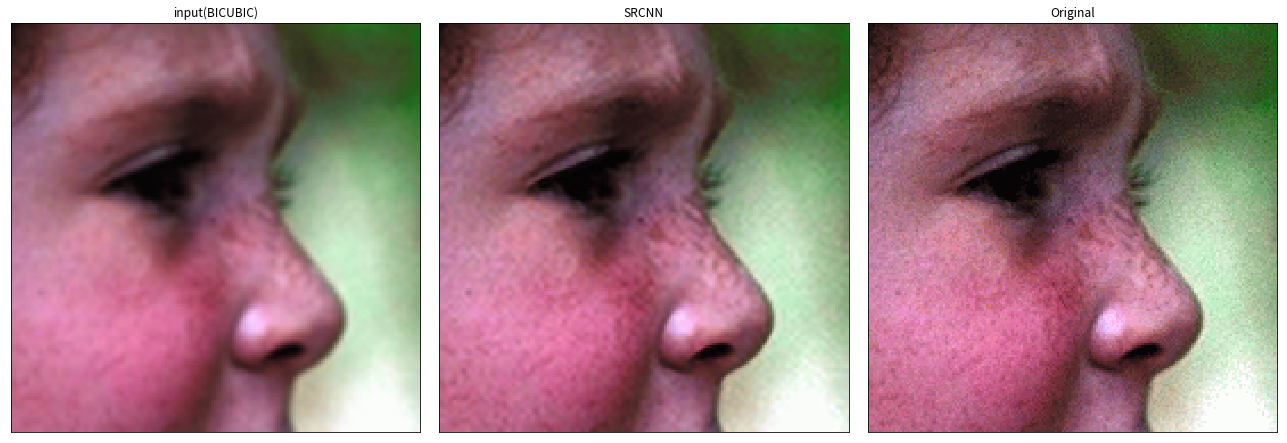

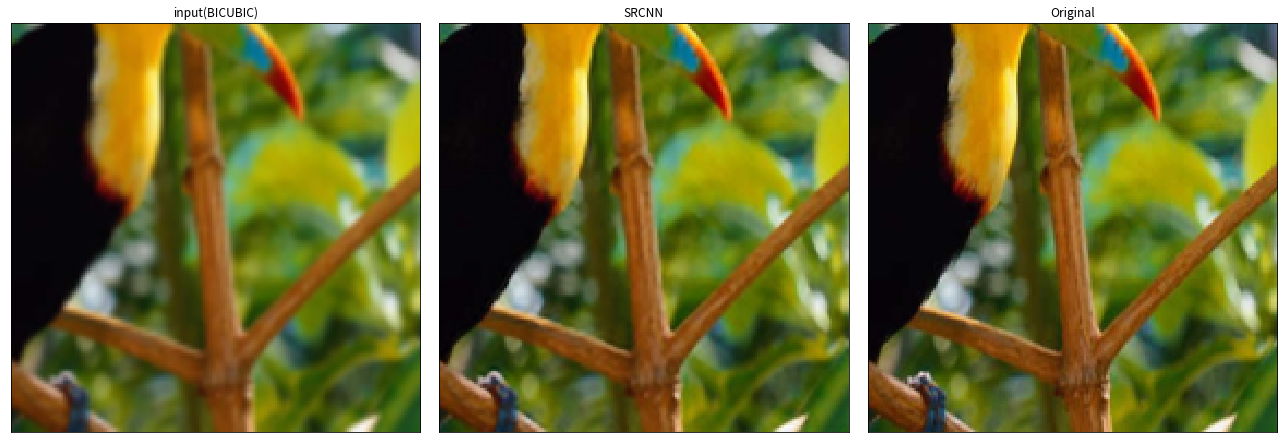

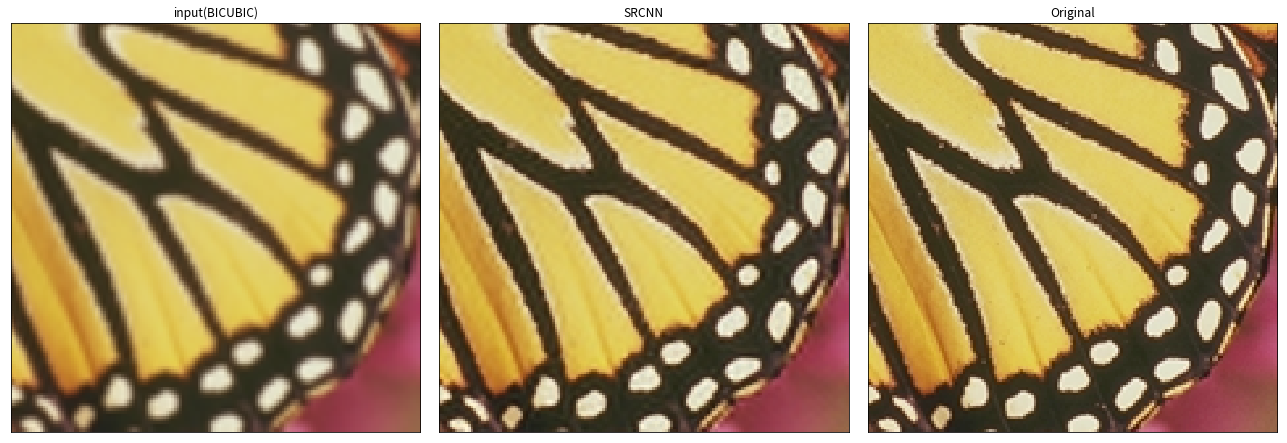

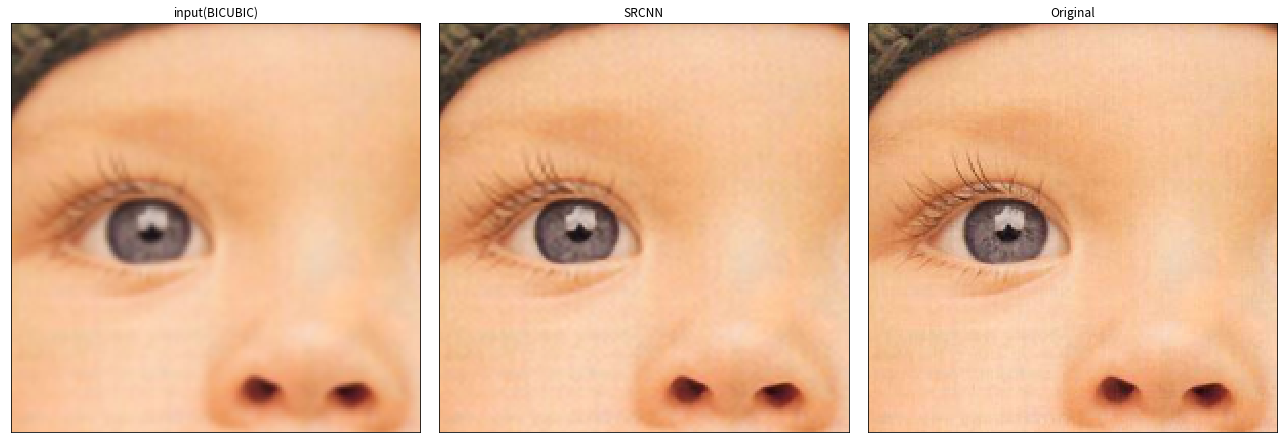

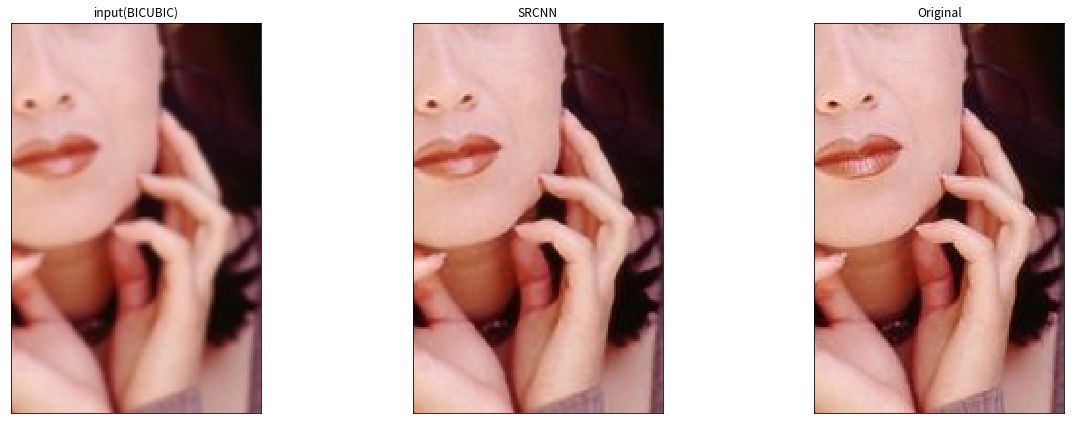

In [12]:
for i, (x, y, pred) in enumerate(data):
    fig, _ = plot_cliped_images(x, y, pred)
    fig.tight_layout()
    fig.savefig(f'clipped_{i}.png', bbox_inches='tight', dpi=120)